# Merge de Datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
atrasos = pd.read_csv('../dex/clean/modelo.csv', delimiter=';')
atrasos.head()

,var_mes,dex_cliente_id,saldo,en_plazo,atr_1_7_dias,atr_8_15_dias,atr_16_30_dias,atr_31_45_dias,atr_46_60_dias,atr_61_90_dias,...,deuda_tot_06_d,mora_01_d,mora_02_d,mora_03_d,mora_04_d,mora_05_d,mora_06_d,num_meses_con_deuda_6_post,flag_default,tmp_max_6m
0,201701,12002,555.47,0.00,0.0,0.00,555.47,0.0,0.0,0.0,...,1105.14,0.0,0.0,0.0,0.0,0.0,0.0,6,0,NaN
1,201701,12045,3083.26,3083.26,0.0,0.00,0.00,0.0,0.0,0.0,...,1786.70,0.0,0.0,0.0,0.0,0.0,0.0,6,0,NaN
2,201701,12050,168.51,168.51,0.0,0.00,0.00,0.0,0.0,0.0,...,714.32,0.0,0.0,0.0,0.0,0.0,0.0,6,0,NaN
3,201701,12054,927.16,550.97,0.0,376.19,0.00,0.0,0.0,0.0,...,254.16,0.0,0.0,0.0,0.0,0.0,0.0,6,0,NaN
4,201701,12081,1129.48,999.87,0.0,0.00,129.61,0.0,0.0,0.0,...,986.27,0.0,0.0,0.0,0.0,0.0,0.0,6,0,NaN


In [3]:
atrasos["flag_default"].value_counts(normalize=True) * 100

0    81.51835
1    18.48165
Name: flag_default, dtype: float64

In [4]:
atrasos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135107 entries, 0 to 2135106
Data columns (total 64 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   var_mes                     int64  
 1   dex_cliente_id              int64  
 2   saldo                       float64
 3   en_plazo                    float64
 4   atr_1_7_dias                float64
 5   atr_8_15_dias               float64
 6   atr_16_30_dias              float64
 7   atr_31_45_dias              float64
 8   atr_46_60_dias              float64
 9   atr_61_90_dias              float64
 10  atr_91_120_dias             float64
 11  atr_121_150_dias            float64
 12  atr_151_180_dias            float64
 13  atr_181_360_dias            float64
 14  atr_360_dias_a_mas          float64
 15  nuevo_tramo                 int64  
 16  fecha_obs                   object 
 17  deuda_tot_01_A              float64
 18  tramo_mora_princip_01_A     float64
 19  deuda_tot_02_A       

In [5]:
atrasos["deuda_default"] = (
    atrasos["atr_46_60_dias"]
    +atrasos["atr_61_90_dias"]
    + atrasos["atr_91_120_dias"]
    + atrasos["atr_121_150_dias"]
    + atrasos["atr_151_180_dias"]
    + atrasos["atr_181_360_dias"]
    + atrasos["atr_360_dias_a_mas"]
)

In [6]:
var = [
    "var_mes",
    # "NEGOCIO",
    "dex_cliente_id",
    "saldo",
    # "VENTAS",
    "nuevo_tramo",  # Tramo en donde se encuentra la deuda
    "num_meses_con_deuda_ult6",  # Cantidad de meses que tiene deuda
    "est_mora_act",  # Si se encuentra en mora o al día
    "est_mora_ant_6m",  # Si se encuentro en mora o al día
    "segmento",  # Relacion entre est_mora_actual y est_mora_ant_6m
    "porc_deuda_morosa",  # cartera_atrasa/saldo
    #"RATING",  # rating bajo modelo de riesgos
    "ratio_mora_r3_6m",  #  cantidad de meses que has tenido tramo mayor a 3
    "ratio_mora_r5_6m",  # cantidad de meses que has tenido tramo mayor a 5
    "ratio_mora_r7_6m",  # cantidad de meses que has tenido tramo mayor a 7
    "cartera_atrasada",  # suma de deuda que tiene más de 1 día de atraso
    # "RATIO_SALDO_MAX_6M",  # saldo /max(de deuda de los 6m)
    "t_mora_maxima_6m",  # tramo maximo en 6 meses
    "num_meses_ult_mora",  # cantidad de meses en mora
    "porc_tmp_mas_tot",  # porcentaje desde el tramo hasta el final
    "deuda_default",
    "flag_default",
]

atrasos = atrasos[var]

atrasos.columns = [
    "var_mes",
    # "negocio",
    "customer_id",
    "saldo",
    # "ventas",
    "tramo",
    "cant_meses_con_deuda_6m",
    "est_mora_actual",
    "est_mora_ant_6m",
    "segmento",
    "porcent_deuda_morosa",
    "ratio_mora_r3_6m",
    "ratio_mora_r5_6m",
    "ratio_mora_r7_6m",
    "cartera_atrasada",
    # "ratio_saldo_max_6m",
    "tramo_mora_maximo_6m",
    "cant_meses_ult_mora",
    "porcent_tmp_mas_tot",
    "deuda_default",
    "flag_default",
]

atrasos.head()

,var_mes,customer_id,saldo,tramo,cant_meses_con_deuda_6m,est_mora_actual,est_mora_ant_6m,segmento,porcent_deuda_morosa,ratio_mora_r3_6m,ratio_mora_r5_6m,ratio_mora_r7_6m,cartera_atrasada,tramo_mora_maximo_6m,cant_meses_ult_mora,porcent_tmp_mas_tot,deuda_default,flag_default
0,201701,12002,555.47,3,0,2. En mora,Sin Informacion,F,1.000000,-1,-1,-1,555.47,-1.0,-1,1.000000,0.0,0
1,201701,12045,3083.26,0,0,1. Al dia,Sin Informacion,E,0.000000,-1,-1,-1,0.00,-1.0,-1,0.000000,0.0,0
2,201701,12050,168.51,0,0,1. Al dia,Sin Informacion,E,0.000000,-1,-1,-1,0.00,-1.0,-1,0.000000,0.0,0
3,201701,12054,927.16,2,0,2. En mora,Sin Informacion,F,0.405744,-1,-1,-1,376.19,-1.0,-1,0.405744,0.0,0
4,201701,12081,1129.48,0,0,1. Al dia,Sin Informacion,E,0.114752,-1,-1,-1,129.61,-1.0,-1,0.000000,0.0,0


In [7]:
atrasos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135107 entries, 0 to 2135106
Data columns (total 18 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   var_mes                  int64  
 1   customer_id              int64  
 2   saldo                    float64
 3   tramo                    int64  
 4   cant_meses_con_deuda_6m  int64  
 5   est_mora_actual          object 
 6   est_mora_ant_6m          object 
 7   segmento                 object 
 8   porcent_deuda_morosa     float64
 9   ratio_mora_r3_6m         int64  
 10  ratio_mora_r5_6m         int64  
 11  ratio_mora_r7_6m         int64  
 12  cartera_atrasada         float64
 13  tramo_mora_maximo_6m     float64
 14  cant_meses_ult_mora      int64  
 15  porcent_tmp_mas_tot      float64
 16  deuda_default            float64
 17  flag_default             int64  
dtypes: float64(6), int64(9), object(3)
memory usage: 293.2+ MB


In [8]:
pd.crosstab(atrasos.var_mes, atrasos.flag_default, normalize="index") * 100

flag_default,0,1
var_mes,,
201701,82.715215,17.284785
201702,83.038146,16.961854
201703,83.155282,16.844718
201704,84.378468,15.621532
201705,84.331626,15.668374
201706,80.433670,19.566330
201707,83.227632,16.772368
201708,80.121322,19.878678
201709,82.197031,17.802969


In [9]:
atrasos.segmento.value_counts()

D    1050053
C     484295
E     234393
A     180441
F     100771
B      85154
Name: segmento, dtype: int64

In [10]:
atrasos.to_csv("../dex/clean/base_modelo_completa.csv", index=False)

In [11]:
ventas = pd.read_csv("../dex/clean/modelo1.csv")
ventas = ventas.rename(columns={'dex_cliente_id':'customer_id'})
ventas.head()

,customer_id,var_mes,cant_meses_6M,venta_tot_mean_6M,range_venta,venta_tot_std_6M,venta_cred_max_6M,venta_cred_mean_6M,plazo_venta_cred_6M,dif_max_venta_cred,...,flag_venta_tot_mean_change2_100,flag_venta_tot_mean_change2_menor_100,flag_venta_tot_mean_change2_mayor_100,flag_venta_cred_max_change_0,flag_venta_cred_max_change_mayor_0,flag_venta_cred_max_change_null,flag_venta_cred_max2_change_0,flag_venta_cred_max2_change_mayor_0,flag_venta_cred_max2_change_null,flag_compra_frecuente
0,12002,202103,6,1243.921667,8,421.318203,1253.01,583.205000,7.721524,3,...,0,1,0,0,1,0,0,1,0,1
1,12003,202103,6,427.286667,5,418.401678,0.00,0.000000,0.000000,5,...,0,1,0,0,0,1,0,0,1,0
2,12009,202103,6,754.951667,7,279.567260,969.19,441.456667,6.619770,3,...,0,1,0,0,1,0,0,1,0,1
3,12017,202103,6,731.041667,7,40.997319,0.00,0.000000,0.000000,5,...,0,0,1,0,0,1,0,0,1,1
4,12020,202103,6,629.945000,7,367.919193,0.00,0.000000,0.000000,5,...,0,1,0,0,0,1,0,0,1,1


In [12]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5918170 entries, 0 to 5918169
Data columns (total 27 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   customer_id                            int64  
 1   var_mes                                int64  
 2   cant_meses_6M                          int64  
 3   venta_tot_mean_6M                      float64
 4   range_venta                            int64  
 5   venta_tot_std_6M                       float64
 6   venta_cred_max_6M                      float64
 7   venta_cred_mean_6M                     float64
 8   plazo_venta_cred_6M                    float64
 9   dif_max_venta_cred                     int64  
 10  venta_tot_mean_change                  float64
 11  venta_tot_mean_change2                 float64
 12  venta_cred_max_change                  float64
 13  venta_cred_max_change2                 float64
 14  flag_venta_tot_mean_change_100         int64  
 15

In [13]:
df = pd.merge(ventas, atrasos, how='left', on=['var_mes','customer_id'])
df.head()

,customer_id,var_mes,cant_meses_6M,venta_tot_mean_6M,range_venta,venta_tot_std_6M,venta_cred_max_6M,venta_cred_mean_6M,plazo_venta_cred_6M,dif_max_venta_cred,...,porcent_deuda_morosa,ratio_mora_r3_6m,ratio_mora_r5_6m,ratio_mora_r7_6m,cartera_atrasada,tramo_mora_maximo_6m,cant_meses_ult_mora,porcent_tmp_mas_tot,deuda_default,flag_default
0,12002,202103,6,1243.921667,8,421.318203,1253.01,583.205000,7.721524,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12003,202103,6,427.286667,5,418.401678,0.00,0.000000,0.000000,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12009,202103,6,754.951667,7,279.567260,969.19,441.456667,6.619770,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12017,202103,6,731.041667,7,40.997319,0.00,0.000000,0.000000,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12020,202103,6,629.945000,7,367.919193,0.00,0.000000,0.000000,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5918170 entries, 0 to 5918169
Data columns (total 43 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   customer_id                            int64  
 1   var_mes                                int64  
 2   cant_meses_6M                          int64  
 3   venta_tot_mean_6M                      float64
 4   range_venta                            int64  
 5   venta_tot_std_6M                       float64
 6   venta_cred_max_6M                      float64
 7   venta_cred_mean_6M                     float64
 8   plazo_venta_cred_6M                    float64
 9   dif_max_venta_cred                     int64  
 10  venta_tot_mean_change                  float64
 11  venta_tot_mean_change2                 float64
 12  venta_cred_max_change                  float64
 13  venta_cred_max_change2                 float64
 14  flag_venta_tot_mean_change_100         int64  
 15

In [15]:
#data_cliente = df[['customer_id','var_mes','segmento','tramo','venta_tot_mean_6M']]

In [16]:
#data_cliente

In [17]:
#data_cliente.to_csv('../data_cliente_202011.csv',index=False)

In [18]:
df.flag_default.value_counts(normalize=True) * 100

0.0    80.851286
1.0    19.148714
Name: flag_default, dtype: float64

In [19]:
pd.pivot_table(df, index=["var_mes"], aggfunc={"flag_default": "mean"}) * 100

,flag_default
var_mes,
201801,12.986226
201802,13.561783
201803,17.466745
201804,13.823930
201805,13.830367
201806,16.177624
201807,15.449658
201808,12.971669
201809,13.332868


In [20]:
df.segmento.value_counts()

D    790476
C    364191
E    112728
A    107507
F     57151
B     52501
Name: segmento, dtype: int64

In [21]:
var_cat = [
    "cant_meses_6M",
    "range_venta",
    "dif_max_venta_cred",
    "tramo",
    "cant_meses_con_deuda_6m",
    "est_mora_actual",
    "est_mora_ant_6m",
    "segmento",
    "ratio_mora_r3_6m",
    "ratio_mora_r5_6m",
    "ratio_mora_r7_6m",
    # "ratio_saldo_max_6m",
    "tramo_mora_maximo_6m",
    "cant_meses_ult_mora",
]
var_num = [
    "venta_tot_mean_6M",
    "venta_tot_std_6M",
    "venta_cred_max_6M",
    "venta_cred_mean_6M",
    "plazo_venta_cred_6M",
    "saldo",
    # "ventas",
    "porcent_deuda_morosa",
    "cartera_atrasada",
    "porcent_tmp_mas_tot",
]

In [22]:
for i in var_cat:
    print("--------------------------")
    print("Variable :", i)
    print(pd.crosstab(df[i], df.flag_default, normalize="index") * 100)

--------------------------
Variable : cant_meses_6M
flag_default         0.0         1.0
cant_meses_6M                       
1              74.192454   25.807546
2              69.454098   30.545902
3              67.543539   32.456461
4              67.760971   32.239029
5              71.585923   28.414077
6              83.656927   16.343073
7              55.281207   44.718793
8               0.000000  100.000000
--------------------------
Variable : range_venta
flag_default        0.0        1.0
range_venta                       
1             73.718223  26.281777
2             78.107682  21.892318
3             79.685957  20.314043
4             80.600836  19.399164
5             81.514009  18.485991
6             82.516951  17.483049
7             82.876889  17.123111
8             82.489660  17.510340
9             81.649328  18.350672
10            78.815887  21.184113
--------------------------
Variable : dif_max_venta_cred
flag_default              0.0        1.0
dif_max_ve

In [23]:
for i in var_num:
    print("--------------------------")
    print("Variable :", i)
    print(pd.pivot_table(df, index="flag_default", aggfunc={i: ["mean", "median"]}))

--------------------------
Variable : venta_tot_mean_6M
             venta_tot_mean_6M            
                          mean      median
flag_default                              
0.0                2079.322103  808.635000
1.0                2285.602400  797.411667
--------------------------
Variable : venta_tot_std_6M
             venta_tot_std_6M            
                         mean      median
flag_default                             
0.0                811.115753  270.865469
1.0               1159.827173  349.347539
--------------------------
Variable : venta_cred_max_6M
             venta_cred_max_6M        
                          mean  median
flag_default                          
0.0                2327.470004  777.97
1.0                2843.082635  921.88
--------------------------
Variable : venta_cred_mean_6M
             venta_cred_mean_6M            
                           mean      median
flag_default                               
0.0                 1399

<AxesSubplot:>

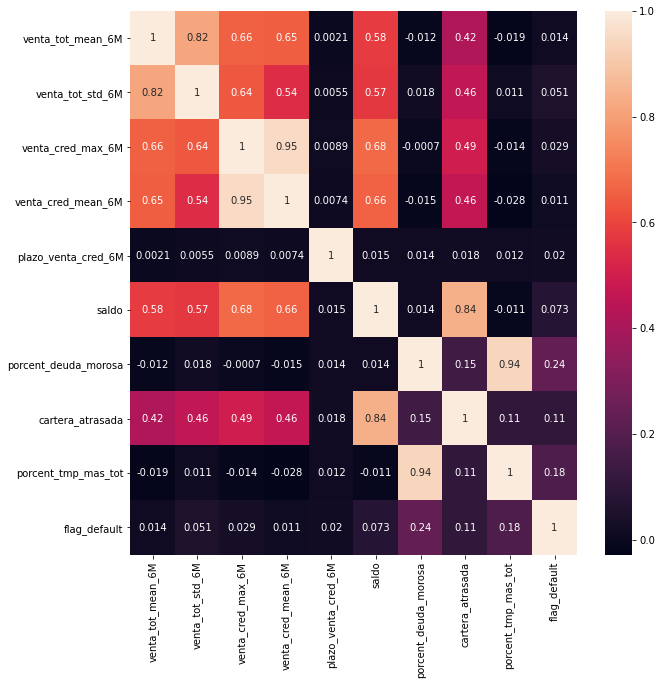

In [24]:
plt.figure(figsize=(10, 10))
sb.heatmap(df[var_num + ["flag_default"]].corr(), annot=True)

In [25]:
df.cant_meses_6M.value_counts()

6    3813253
5     685023
4     420195
1     344181
3     330985
2     304745
7      19781
8          7
Name: cant_meses_6M, dtype: int64

In [26]:
df.est_mora_ant_6m.value_counts()

2. Alguna vez en mora    1154667
Sin Informacion           169879
1. Siempre al dia         160008
Name: est_mora_ant_6m, dtype: int64

In [27]:
df.segmento.value_counts()

D    790476
C    364191
E    112728
A    107507
F     57151
B     52501
Name: segmento, dtype: int64

In [28]:
df["porcentaje_venta_credit_max"] = (
    df["venta_cred_max_6M"] * 100 / df["venta_cred_mean_6M"]
)
df["porcentaje_venta_credit_max2"] = (
    df["venta_cred_max_6M"] * 100 / df["venta_tot_mean_6M"]
)

In [29]:
df["porcentaje_venta_credit_max"].describe()

count    2.099522e+06
mean     2.803568e+02
std      1.661530e+02
min      1.000000e+02
25%      1.520049e+02
50%      2.053542e+02
75%      3.773861e+02
max      7.000000e+02
Name: porcentaje_venta_credit_max, dtype: float64

In [30]:
pd.pivot_table(
    df,
    index="flag_default",
    aggfunc={"porcentaje_venta_credit_max2": ["mean", "median"]},
)

porcentaje_venta_credit_max2            
                                     mean      median
flag_default                                         
0.0                            106.550630  117.312550
1.0                            129.227399  131.797774

In [31]:
df.loc[df.venta_cred_mean_6M == 0, "porcentaje_venta_credit_max"] = 0

In [32]:
df[["porcentaje_venta_credit_max", "porcentaje_venta_credit_max2"]].describe()

,porcentaje_venta_credit_max,porcentaje_venta_credit_max2
count,5.918170e+06,5.918170e+06
mean,9.945898e+01,4.023673e+01
std,1.666903e+02,6.718261e+01
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,1.594761e+02,8.104525e+01
max,7.000000e+02,6.230207e+02


In [33]:
df["flag_porcent_venta_cred_max"] = 0
df.loc[df["porcentaje_venta_credit_max"] > 100, "flag_porcent_venta_cred_max"] = 1

pd.crosstab(
    df.flag_porcent_venta_cred_max, df.flag_default, normalize="index"
) * 100

flag_default,0.0,1.0
flag_porcent_venta_cred_max,,
0,86.978747,13.021253
1,79.891184,20.108816


In [34]:
df["flag_porcent_venta_cred_max2"] = 0
df.loc[df["porcentaje_venta_credit_max2"] > 100, "flag_porcent_venta_cred_max2"] = 1

pd.crosstab(
    df.flag_porcent_venta_cred_max2, df.flag_default, normalize="index"
) * 100

flag_default,0.0,1.0
flag_porcent_venta_cred_max2,,
0,85.038565,14.961435
1,78.553552,21.446448


In [35]:
pd.crosstab(
    df[df.tramo < 5].var_mes, df[df.tramo < 5].flag_default, normalize="index"
) * 100

flag_default,0.0,1.0
var_mes,,
201801,90.864236,9.135764
201802,90.086746,9.913254
201803,86.737833,13.262167
201804,89.177687,10.822313
201805,90.519040,9.480960
201806,87.937763,12.062237
201807,87.208477,12.791523
201808,89.050178,10.949822
201809,88.462741,11.537259


In [36]:
df.shape

(5918170, 47)

In [37]:
df = df[(df.segmento.notnull())].copy()
df.shape

(1484554, 47)

In [38]:
pd.pivot_table(df, index="var_mes", columns="tramo", aggfunc={"customer_id": "count"})

customer_id                                                         \
tramo          0.0    1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0    
var_mes                                                                      
201801        32315   8553  4746  3603  1857  1066   841   373   199    99   
201802        33468   9353  4621  3528  1021   638   937   369   206   149   
201803        14616  10559  6854  4748  1256   528   524   433   222   157   
201804        32693   8840  4826  4677  1596   565   418   233   232   136   
201805        33597   9647  5214  3879  1339  1088   805   202   147   154   
201806        15425   9792  6446  6244  1812   677  1283   550   147   107   
201807        14134  10427  6797  5993  2097   856   634   241   171    89   
201808        13836  10121  6529  5424  1497  1131  1097   317   139   308   
201809        16253  10825  7138  5820  1551   632   411   192    84    13   
201810        16758  11568  8015  6844  1787   727   516   152   100    56   
201811        16799  12139  8084  8331  2596   873   594   179    70    59   
201812        14815  10679  6734  9064  2997  1207   750   135    49    28   
201901        14231   9936  6806  5489  2845  1537  1076   209    73    34   
201902        14464  10020  7310  6083  1661   830  1231   278    98    39   
201903        15023   9891  6897  6355  1984   791   599   323   109    64   
201904        13812   9401  7348  7437  2187  1081   755   260   125    49   
201905        32703   9559  5568  4925  1517  1102   565   208    96    56   
201906        18545  22448  5822  6622  2039   826   815   201   150    67   
201907        31455  10360  5720  5791  1699  1536  1002   263    80   110   
201908        31137  10653  5649  5728  1897   817  1192   577   145    47   
201909        17057  10088  5986  6866  1981  1120   741   774   498   126   
201910        15550  10846  7577  7989  2645   955   892   236   567   406   
201911        15044  11604  8132  9453  2897  1457   927   302    99   483   
201912        11528  10592  8365  8588  3697  1885  1263   443   103    62   
202001        13219   9804  6510  5526  3114  1609  1241   588   304    82   
202002        13500   9197  6843  6565  1894  1068  1337   402   379   251   
202003         6953   6786  7870  8228  2760  1376   995   665   209   329   
202004         4878   2753  2226  2948  5279  3453  2019   612   386   154   
202005         4655   2318  1494  1362   707   680  4932  1290   486   275   
202006         3770   2057  1183   857   444   275   525  2935   953   385   
202007         3676   2238  1148   790   328   159   215   252  1919   771   
202008         4101   2145   833   667   253   148   140   111   165  1217   
202009         4591   2150  1015   695   215   149   133    69    70   114   
202010         7186   3605  1660   989   262   110   129    57    41    54   
202011         9127   4125  2040  2015   663   171    98    87    38    31   
202012         5424   4170  2993  2427   950   363   221    63    65    20   
202101         7191   3579  1837  1206   740   289   296    78    41    39   
202102         5240   2840  1372  1746   531   279   283   126    46    35   
202103         5657   3132  1666  1228   492   381   264   132    76    38   

                     
tramo    10.0  11.0  
var_mes              
201801    268   530  
201802    255   551  
201803    300   549  
201804    303   516  
201805    306   533  
201806    341   526  
201807    311   471  
201808    111   117  
201809     29    36  
201810     36    34  
201811     60    33  
201812     72    19  
201901     61    25  
201902     61    24  
201903     69    22  
201904     75    25  
201905   1220   340  
201906    512  1053  
201907    104    45  
201908    165    45  
201909    178    51  
201910    233    56  
201911    540    52  
201912    939    58  
202001    985    63  
202002    967    58  
202003    383    58  
202004    637    82  
202005    688    97  
202006    864   114  
20200

In [39]:
data = df[
    (df.tramo < 5) & (df.var_mes <= 202003) & (df.var_mes >= 201901)
].copy()

In [40]:
data.shape

(664271, 47)

In [41]:
pd.crosstab(data.segmento, data.flag_default, normalize="index") * 100

flag_default,0.0,1.0
segmento,,
A,93.401254,6.598746
B,82.853234,17.146766
C,87.347631,12.652369
D,76.066823,23.933177
E,94.590564,5.409436
F,89.433677,10.566323


In [42]:
data.segmento.value_counts(normalize=True) * 100

D    52.193608
C    26.700850
E     6.662341
A     6.412895
F     4.178716
B     3.851591
Name: segmento, dtype: float64

In [43]:
data["seg_a"] = 0
data["seg_db"] = 0
data["seg_c"] = 0
data["seg_e"] = 0

data.loc[data.segmento.isin(["A"]), "seg_a"] = 1
data.loc[data.segmento.isin(["B", "D"]), "seg_db"] = 1
data.loc[data.segmento.isin(["C"]), "seg_c"] = 1
data.loc[data.segmento.isin(["E"]), "seg_e"] = 1

In [44]:
data["seg_ace"] = 0
data["seg_b"] = 0
data["seg_df"] = 0

data.loc[data.segmento.isin(["A", "C", "E"]), "seg_ace"] = 1
data.loc[data.segmento.isin(["B"]), "seg_b"] = 1
data.loc[data.segmento.isin(["D", "F"]), "seg_df"] = 1

In [45]:
for i in ["seg_ace", "seg_b", "seg_df", "seg_a", "seg_db", "seg_c", "seg_e"]:
    print(pd.crosstab(data[i], data.flag_default, normalize="index") * 100)

flag_default        0.0        1.0
seg_ace                           
0             77.428321  22.571679
1             89.536789  10.463211
flag_default        0.0        1.0
seg_b                             
0             82.220215  17.779785
1             82.853234  17.146766
flag_default        0.0        1.0
seg_df                            
0             88.946744  11.053256
1             77.057669  22.942331
flag_default        0.0        1.0
seg_a                             
0             81.480105  18.519895
1             93.401254   6.598746
flag_default        0.0        1.0
seg_db                            
0             89.526987  10.473013
1             76.533205  23.466795
flag_default        0.0        1.0
seg_c                             
0             80.385702  19.614298
1             87.347631  12.652369
flag_default        0.0        1.0
seg_e                             
0             81.363354  18.636646
1             94.590564   5.409436


In [46]:
pd.crosstab(
    data.flag_porcent_venta_cred_max, data.flag_default, normalize="index"
) * 100

flag_default,0.0,1.0
flag_porcent_venta_cred_max,,
0,95.293823,4.706177
1,80.462683,19.537317


In [47]:
pd.crosstab(
    data.flag_porcent_venta_cred_max2, data.flag_default, normalize="index"
) * 100

flag_default,0.0,1.0
flag_porcent_venta_cred_max2,,
0,88.451696,11.548304
1,79.235419,20.764581


In [48]:
data["saldo"].describe()

count    664271.000000
mean       1359.657571
std        4418.034638
min      -12015.860000
25%         122.520000
50%         351.340000
75%        1043.575000
max      513292.760000
Name: saldo, dtype: float64

In [49]:
data["flag_saldo_menor_0"] = 0

data.loc[data.saldo <= 0, "flag_saldo_menor_0"] = 1

data["flag_saldo_menor_0"].value_counts(normalize=True) * 100

0    96.643388
1     3.356612
Name: flag_saldo_menor_0, dtype: float64

In [50]:
pd.crosstab(data["flag_saldo_menor_0"], data.flag_default, normalize="index") * 100

flag_default,0.0,1.0
flag_saldo_menor_0,,
0,81.725428,18.274572
1,97.192447,2.807553


In [51]:
data["saldo2"] = data["saldo"].values

data.loc[data.saldo <= 0, "saldo2"] = 0

data.saldo2.describe()

count    664271.000000
mean       1360.334683
std        4417.606694
min           0.000000
25%         122.520000
50%         351.340000
75%        1043.575000
max      513292.760000
Name: saldo2, dtype: float64

In [52]:
data["porcent_saldo_venta"] = data["saldo2"] * 100 / data["venta_tot_mean_6M"]

data.porcent_saldo_venta.describe()

count    664271.000000
mean         60.107326
std          50.462535
min           0.000000
25%          26.048479
50%          49.887925
75%          82.541856
max       10347.126437
Name: porcent_saldo_venta, dtype: float64

In [53]:
data["porcent_saldo_venta_menor_20"] = 0
data["porcent_saldo_venta_20_50"] = 0
data["porcent_saldo_venta_mayor_50"] = 0

data.loc[data.porcent_saldo_venta <= 20, "porcent_saldo_venta_menor_20"] = 1
data.loc[
    (data.porcent_saldo_venta <= 50) & (data.porcent_saldo_venta > 20),
    "porcent_saldo_venta_20_50",
] = 1
data.loc[(data.porcent_saldo_venta > 50), "porcent_saldo_venta_mayor_50"] = 1

In [54]:
for i in [
    "porcent_saldo_venta_menor_20",
    "porcent_saldo_venta_20_50",
    "porcent_saldo_venta_mayor_50",
]:
    print(data[i].value_counts(normalize=True) * 100)

0    81.532537
1    18.467463
Name: porcent_saldo_venta_menor_20, dtype: float64
0    68.353729
1    31.646271
Name: porcent_saldo_venta_20_50, dtype: float64
0    50.113734
1    49.886266
Name: porcent_saldo_venta_mayor_50, dtype: float64


In [55]:
for i in [
    "porcent_saldo_venta_menor_20",
    "porcent_saldo_venta_20_50",
    "porcent_saldo_venta_mayor_50",
]:
    print(pd.crosstab(data[i], data.flag_default, normalize="index") * 100)

flag_default                        0.0        1.0
porcent_saldo_venta_menor_20                      
0                             80.335932  19.664068
1                             90.671210   9.328790
flag_default                     0.0        1.0
porcent_saldo_venta_20_50                      
0                          79.658807  20.341193
1                          87.829719  12.170281
flag_default                        0.0        1.0
porcent_saldo_venta_mayor_50                      
0                             88.876840  11.123160
1                             75.582111  24.417889


In [56]:
i = 8
data["range_saldo"] = pd.qcut(data["saldo"], i, labels=list(range(1, i + 1)))
data["range_saldo"].value_counts()

1    83163
7    83034
8    83034
4    83033
6    83033
5    83031
3    83030
2    82913
Name: range_saldo, dtype: int64

In [57]:
data["range_saldo"] = data["range_saldo"].astype(int)

In [58]:
pd.crosstab(data["range_saldo"], data.flag_default, normalize="index") * 100

flag_default,0.0,1.0
range_saldo,,
1,88.714933,11.285067
2,85.864702,14.135298
3,84.789835,15.210165
4,84.252044,15.747956
5,83.158098,16.841902
6,80.553515,19.446485
7,78.217357,21.782643
8,72.401667,27.598333


In [59]:
pd.pivot_table(data, index="range_saldo", aggfunc={"saldo": ["min", "max"]})

saldo          
                   max       min
range_saldo                     
1                50.00 -12015.86
2               122.52     50.01
3               216.91    122.53
4               351.34    216.92
5               570.94    351.34
6              1043.57    570.95
7              2384.92   1043.58
8            513292.76   2385.00

In [60]:
for i in [
    "flag_compra_frecuente",
    "flag_venta_tot_mean_change_100",
    "flag_venta_tot_mean_change_menor_100",
    "flag_venta_tot_mean_change_mayor_100",
    "flag_venta_tot_mean_change2_100",
    "flag_venta_tot_mean_change2_menor_100",
    "flag_venta_tot_mean_change2_mayor_100",
    "flag_venta_cred_max_change_0",
    "flag_venta_cred_max_change_mayor_0",
    "flag_venta_cred_max_change_null",
    "flag_venta_cred_max2_change_0",
    "flag_venta_cred_max2_change_mayor_0",
    "flag_venta_cred_max2_change_null",
]:
    print(pd.crosstab(data[i], data.flag_default, normalize="index") * 100)

flag_default                 0.0        1.0
flag_compra_frecuente                      
0                      77.213532  22.786468
1                      83.988761  16.011239
flag_default                          0.0        1.0
flag_venta_tot_mean_change_100                      
0                               82.259206  17.740794
1                               81.575425  18.424575
flag_default                                0.0        1.0
flag_venta_tot_mean_change_menor_100                      
0                                     81.996574  18.003426
1                                     82.515505  17.484495
flag_default                                0.0        1.0
flag_venta_tot_mean_change_mayor_100                      
0                                     82.475277  17.524723
1                                     82.014546  17.985454
flag_default                           0.0        1.0
flag_venta_tot_mean_change2_100                      
0                               

In [61]:
pd.crosstab(data["tramo"], data.flag_default, normalize="index") * 100

flag_default,0.0,1.0
tramo,,
0.0,89.536789,10.463211
1.0,87.658901,12.341099
2.0,81.317930,18.682070
3.0,65.934379,34.065621
4.0,52.181406,47.818594


In [62]:
data.est_mora_actual.unique()

array(['1. Al dia', '2. En mora'], dtype=object)

In [63]:
data["est_mora_actual"].replace({"1. Al dia": 1, "2. En mora": 0}, inplace=True)
data["est_mora_actual"].value_counts()

0    400050
1    264221
Name: est_mora_actual, dtype: int64

In [64]:
data.est_mora_ant_6m.value_counts()

2. Alguna vez en mora    524073
Sin Informacion           72014
1. Siempre al dia         68184
Name: est_mora_ant_6m, dtype: int64

In [65]:
#data["est_mora_ant_6m"].replace({"1. Siempre al dia": 1, "2. Alguna vez en mora": 0, "Sin Informacion":2}, inplace=True)
#data["est_mora_ant_6m"].value_counts()

In [66]:
data.flag_default = data.flag_default.astype(int)
data.flag_default.value_counts()

0    546327
1    117944
Name: flag_default, dtype: int64

<AxesSubplot:>

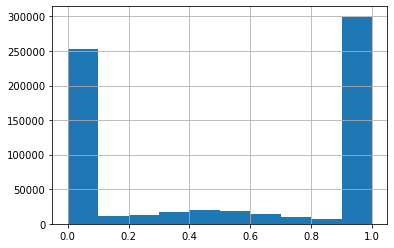

In [67]:
data.porcent_deuda_morosa.hist()

In [68]:
data.porcent_deuda_morosa.describe()

count    664271.000000
mean          0.531488
std           0.461114
min           0.000000
25%           0.000000
50%           0.593269
75%           1.000000
max           1.000000
Name: porcent_deuda_morosa, dtype: float64

In [69]:
data["porcent_deuda_igual_0"] = 0
data["porcent_deuda_de_0_50"] = 0
data["porcent_deuda_de_50_100"] = 0

data.loc[(data.porcent_deuda_morosa == 0), "porcent_deuda_igual_0",] = 1
data.loc[
    (data.porcent_deuda_morosa > 0) & (data.porcent_deuda_morosa <= 0.5),
    "porcent_deuda_de_0_50",
] = 1
data.loc[
    (data.porcent_deuda_morosa >= 0.5) & (data.porcent_deuda_morosa <= 1),
    "porcent_deuda_de_50_100",
] = 1

In [70]:
pd.crosstab(
    data["porcent_deuda_igual_0"], data["flag_default"], normalize="index"
) * 100

flag_default,0,1
porcent_deuda_igual_0,,
0,77.466476,22.533524
1,90.539956,9.460044


In [71]:
pd.crosstab(
    data["porcent_deuda_de_0_50"], data["flag_default"], normalize="index"
) * 100

flag_default,0,1
porcent_deuda_de_0_50,,
0,82.619252,17.380748
1,79.143272,20.856728


In [72]:
pd.crosstab(
    data["porcent_deuda_de_50_100"], data["flag_default"], normalize="index"
) * 100

flag_default,0,1
porcent_deuda_de_50_100,,
0,87.759375,12.240625
1,77.234988,22.765012


In [73]:
pd.crosstab(data["tramo_mora_maximo_6m"], data["flag_default"], normalize="index") * 100

flag_default,0,1
tramo_mora_maximo_6m,,
-1.0,92.602827,7.397173
0.0,89.443271,10.556729
1.0,90.120431,9.879569
2.0,87.001386,12.998614
3.0,81.439812,18.560188
4.0,68.861827,31.138173
5.0,52.866193,47.133807
6.0,44.794391,55.205609
7.0,50.322581,49.677419


In [74]:
data.plazo_venta_cred_6M.describe()

count    664271.000000
mean         16.740838
std         286.236530
min           0.000000
25%           5.558332
50%          14.160996
75%          22.648012
max      129150.592593
Name: plazo_venta_cred_6M, dtype: float64

In [75]:
data.head().to_clipboard()

In [76]:
data

,customer_id,var_mes,cant_meses_6M,venta_tot_mean_6M,range_venta,venta_tot_std_6M,venta_cred_max_6M,venta_cred_mean_6M,plazo_venta_cred_6M,dif_max_venta_cred,...,flag_saldo_menor_0,saldo2,porcent_saldo_venta,porcent_saldo_venta_menor_20,porcent_saldo_venta_20_50,porcent_saldo_venta_mayor_50,range_saldo,porcent_deuda_igual_0,porcent_deuda_de_0_50,porcent_deuda_de_50_100
1792801,12002,202003,6,1959.223333,9,1591.959310,1442.12,998.520000,20.602923,4,...,0,825.31,42.124345,0,1,0,6,1,0,0
1792803,12009,202003,6,1047.263333,8,263.789981,1144.88,653.860000,15.442213,4,...,0,326.92,31.216599,0,1,0,4,0,0,1
1792807,12045,202003,6,2892.536667,10,1371.705600,3933.80,2413.125000,16.784419,4,...,0,455.96,15.763327,1,0,0,5,0,0,1
1792808,12048,202003,6,2127.681667,9,990.277619,3515.05,1619.986667,15.885013,0,...,0,2078.49,97.688016,0,0,1,7,0,0,1
1792809,12050,202003,6,787.528333,7,152.348331,894.18,701.446667,21.069813,4,...,0,693.30,88.034928,0,0,1,6,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4087466,1548555,201901,1,262.230000,4,0.000000,0.00,0.000000,0.000000,0,...,1,0.00,0.000000,1,0,0,1,1,0,0
4087488,1548586,201901,1,1435.680000,9,0.000000,1378.66,1378.660000,18.722689,0,...,0,867.09,60.395771,0,0,1,6,1,0,0
4087492,1548591,201901,1,294.750000,4,0.000000,294.75,294.750000,31.000000,0,...,0,294.75,100.000000,0,0,1,4,1,0,0
4087500,1548603,201901,1,66.050000,1,0.000000,0.00,0.000000,6.683422,0,...,0,14.24,21.559425,0,1,0,1,0,0,1


In [77]:
data["venta_mean_6M_scalar"] = (
    data["venta_tot_mean_6M"] - data["venta_tot_mean_6M"].mean()
) / data["venta_tot_mean_6M"].std()

data["venta_mean_6M_scalar"].describe()

count    6.642710e+05
mean     8.497363e-17
std      1.000000e+00
min     -3.796633e-01
25%     -3.129707e-01
50%     -2.349405e-01
75%     -4.192775e-02
max      8.027399e+01
Name: venta_mean_6M_scalar, dtype: float64

In [78]:
data.columns

Index(['customer_id', 'var_mes', 'cant_meses_6M', 'venta_tot_mean_6M',
       'range_venta', 'venta_tot_std_6M', 'venta_cred_max_6M',
       'venta_cred_mean_6M', 'plazo_venta_cred_6M', 'dif_max_venta_cred',
       'venta_tot_mean_change', 'venta_tot_mean_change2',
       'venta_cred_max_change', 'venta_cred_max_change2',
       'flag_venta_tot_mean_change_100',
       'flag_venta_tot_mean_change_menor_100',
       'flag_venta_tot_mean_change_mayor_100',
       'flag_venta_tot_mean_change2_100',
       'flag_venta_tot_mean_change2_menor_100',
       'flag_venta_tot_mean_change2_mayor_100', 'flag_venta_cred_max_change_0',
       'flag_venta_cred_max_change_mayor_0', 'flag_venta_cred_max_change_null',
       'flag_venta_cred_max2_change_0', 'flag_venta_cred_max2_change_mayor_0',
       'flag_venta_cred_max2_change_null', 'flag_compra_frecuente', 'saldo',
       'tramo', 'cant_meses_con_deuda_6m', 'est_mora_actual',
       'est_mora_ant_6m', 'segmento', 'porcent_deuda_morosa',
       'rat

In [79]:
data['ratio_mora_r3_6m']

1792801    1.0
1792803    1.0
1792807    3.0
1792808    0.0
1792809    1.0
          ... 
4087466   -1.0
4087488   -1.0
4087492   -1.0
4087500   -1.0
4087513   -1.0
Name: ratio_mora_r3_6m, Length: 664271, dtype: float64

In [80]:
#data = pd.get_dummies(data, columns=['est_mora_ant_6m','segmento'])
#data

In [81]:
data.to_csv('../dex/clean/final.csv', index=False)